In [1]:
import pandas as pd
df1=pd.read_csv('/content/gnomix-main/demo/data/allchrs.b37.gmap',sep='\t',error_bad_lines=False)
df3=pd.read_csv('/content/AncestryDNA.txt',sep='\t',error_bad_lines=False)

<ipython-input-1-8bfde3189ff1>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1=pd.read_csv('/content/gnomix-main/demo/data/allchrs.b37.gmap',sep='\t',error_bad_lines=False)
<ipython-input-1-8bfde3189ff1>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('/content/gnomix-main/demo/data/allchrs.b37.gmap',sep='\t',error_bad_lines=False)
<ipython-input-1-8bfde3189ff1>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df3=pd.read_csv('/content/AncestryDNA.txt',sep='\t',error_bad_lines=False)


In [2]:
df2=pd.read_csv('/content/1000g.meta',sep='\t',error_bad_lines=False)

<ipython-input-2-3fe60c8840e6>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2=pd.read_csv('/content/1000g.meta',sep='\t',error_bad_lines=False)


In [3]:
df1.head()

,#chromosome,position,Genetic_Map(cM)
0,10,72765,0.000000
1,10,94172,0.002664
2,10,94426,0.002705
3,10,95949,0.002947
4,10,98087,0.003287


In [4]:
df1=df1.drop(['Genetic_Map(cM)'],axis=1)

In [5]:
df2.head()

,Sample,Population code,Population,Superpopulation code,Superpopulation
0,HG02922,ESN,Esan,AFR,African
1,HG02923,ESN,Esan,AFR,African
2,HG02938,ESN,Esan,AFR,African
3,HG02941,ESN,Esan,AFR,African
4,HG02943,ESN,Esan,AFR,African


In [6]:
df2=df2.drop(['Sample',	'Population code','Superpopulation code',	'Superpopulation'],axis=1)

In [7]:
df3.head()

,rsid,chromosome,position,allele1,allele2
0,rs4477212,1,82154,T,T
1,rs3131972,1,752721,G,G
2,rs12562034,1,768448,G,G
3,rs11240777,1,798959,G,G
4,rs6681049,1,800007,C,C


In [8]:
df3=df3.drop(['rsid','allele1',	'allele2'],axis=1)

In [9]:
df=pd.merge(df1, df2,left_index=True, right_index=True)
df.head()

,#chromosome,position,Population
0,10,72765,Esan
1,10,94172,Esan
2,10,94426,Esan
3,10,95949,Esan
4,10,98087,Esan


In [10]:
df.tail()

,#chromosome,position,Population
1215,10,1207809,Tuscan
1216,10,1208101,Tuscan
1217,10,1208148,Tuscan
1218,10,1208271,Tuscan
1219,10,1209724,Tuscan


In [32]:
X = df.drop(['Population'],axis=1)
y = df['Population']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB



from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(y_pred[:200])

['Kinh Vietnamese' 'Yoruba' 'Luhya' 'Han Chinese' 'Tuscan' 'Luhya'
 'Kinh Vietnamese' 'Han Chinese' 'Japanese' 'Han Chinese' 'Han Chinese'
 'Kinh Vietnamese' 'Spanish' 'Yoruba' 'Mende' 'Spanish' 'Luhya' 'Spanish'
 'Yoruba' 'Mende' 'Southern Han Chinese' 'Gambian Mandinka' 'Spanish'
 'Mende' 'Mende' 'Southern Han Chinese' 'Japanese' 'Kinh Vietnamese'
 'British' 'Luhya' 'Tuscan' 'Japanese' 'Japanese' 'Yoruba' 'Japanese'
 'Spanish' 'Spanish' 'Esan' 'Gambian Mandinka' 'Tuscan' 'Han Chinese'
 'Spanish' 'Kinh Vietnamese' 'Southern Han Chinese' 'Kinh Vietnamese'
 'Han Chinese' 'Luhya' 'Japanese' 'Gambian Mandinka'
 'Southern Han Chinese' 'Gambian Mandinka' 'Han Chinese' 'Kinh Vietnamese'
 'Kinh Vietnamese' 'Esan' 'Gambian Mandinka' 'Gambian Mandinka' 'British'
 'Tuscan' 'Luhya' 'British' 'Gambian Mandinka' 'Gambian Mandinka' 'Esan'
 'Japanese' 'Kinh Vietnamese' 'Yoruba' 'Japanese' 'Spanish' 'British'
 'Tuscan' 'Yoruba' 'Luhya' 'Gambian Mandinka' 'Spanish' 'Han Chinese'
 'Spanish' 'British' 'S

In [33]:
from sklearn.metrics import  recall_score, accuracy_score, classification_report





accuracy = accuracy_score(y_pred, y_test)

                      precision    recall  f1-score   support

             British       1.00      0.94      0.97        17
                Esan       1.00      1.00      1.00        12
    Gambian Mandinka       1.00      0.95      0.98        21
         Han Chinese       1.00      1.00      1.00        22
            Japanese       1.00      1.00      1.00        21
     Kinh Vietnamese       1.00      1.00      1.00        21
               Luhya       0.96      1.00      0.98        22
               Mende       1.00      1.00      1.00        21
Southern Han Chinese       1.00      1.00      1.00        25
             Spanish       0.95      1.00      0.98        20
              Tuscan       1.00      1.00      1.00        20
              Yoruba       1.00      1.00      1.00        22

            accuracy                           0.99       244
           macro avg       0.99      0.99      0.99       244
        weighted avg       0.99      0.99      0.99       244

F1 Sc

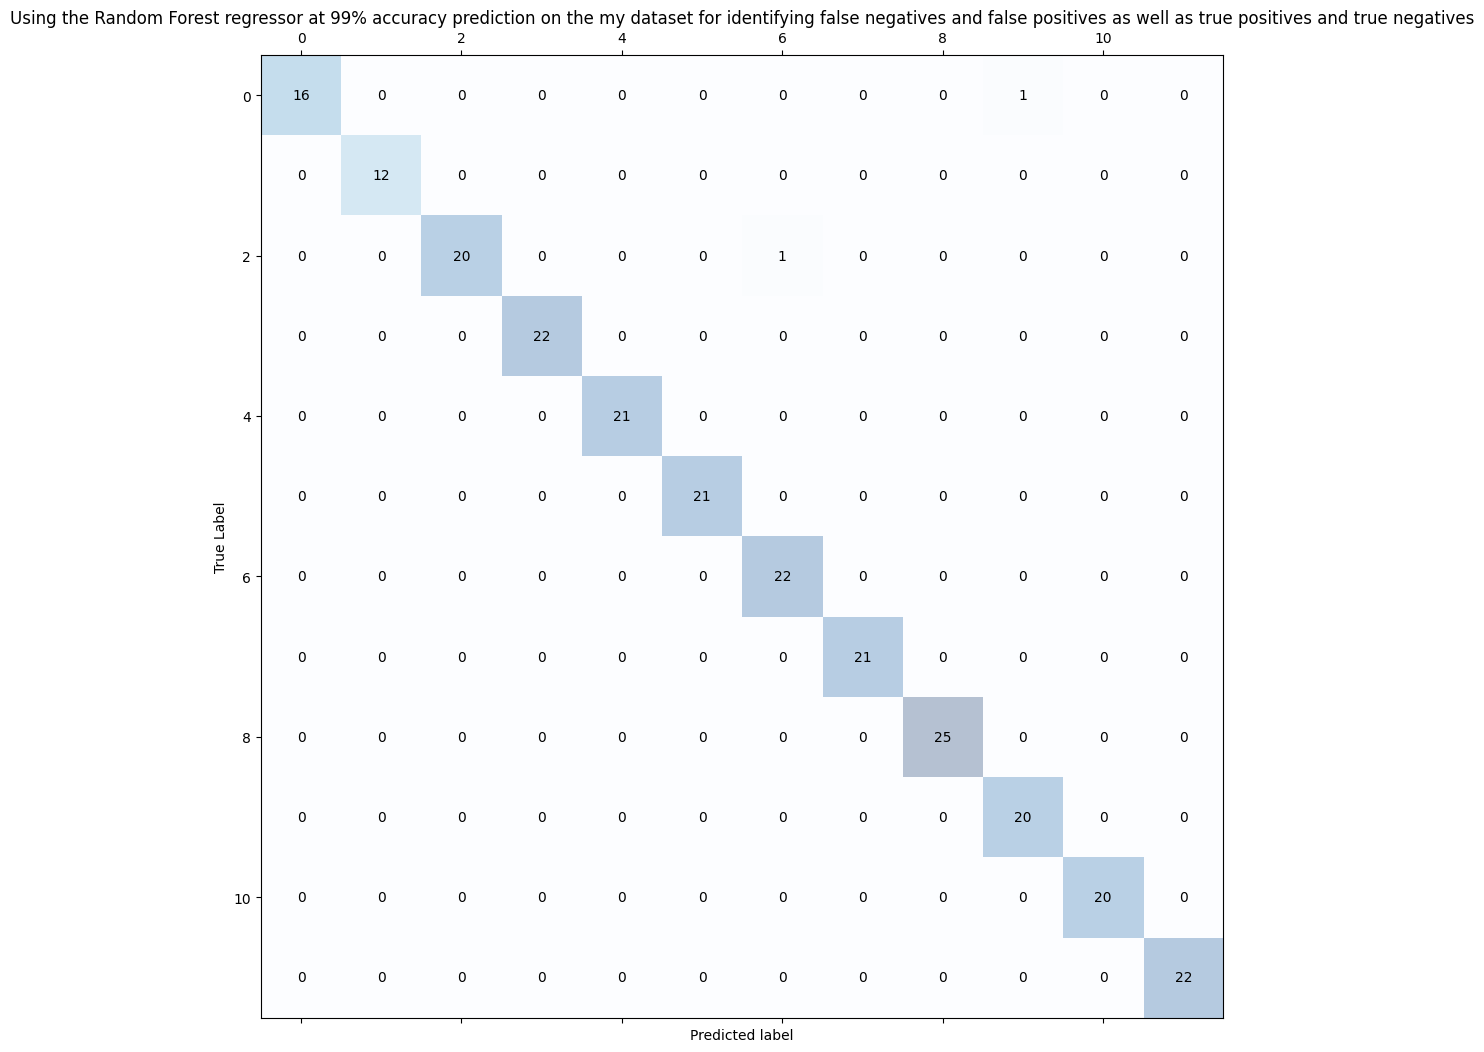

In [34]:
import matplotlib.pyplot as plt

print(classification_report(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred,average='macro'))

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(confmat)

fig, ax =plt.subplots(figsize=(12.5, 12.5))
ax.matshow(confmat,  cmap=plt.cm.Blues, alpha=0.30)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
    plt.title('Using the Random Forest regressor at 99% accuracy prediction on the my dataset for identifying false negatives and false positives as well as true positives and true negatives')
    plt.xlabel('Predicted label')
    plt.ylabel('True Label')

In [35]:
new_pred=model.predict(df3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [38]:
print(new_pred)

['Tuscan' 'Tuscan' 'Tuscan' ... 'Tuscan' 'Tuscan' 'Tuscan']
